In [89]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression

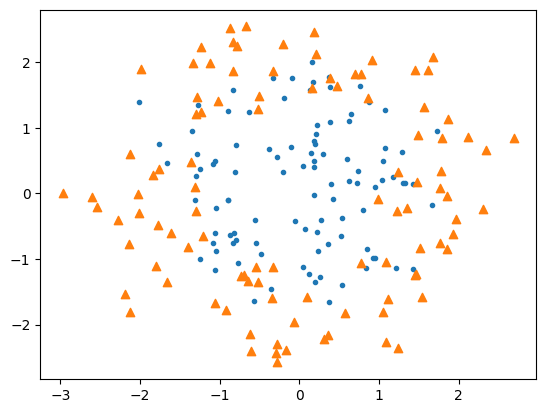

In [48]:
a = np.array([[np.cos(i) + 0.5 * np.random.randn(), np.sin(i) + 0.5 * np.random.randn(), 1] for i in range(100)])
b = np.array([[2 * np.cos(i) + 0.5 * np.random.randn(), 2 * np.sin(i) + 0.5 * np.random.randn(), 0] for i in range(200, 300)])
plt.scatter(a[:, 0], a[:, 1], marker='.')
plt.scatter(b[:, 0], b[:, 1], marker='^')

In [49]:
data = pd.DataFrame(np.concatenate([a, b], axis=0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :2], data.iloc[:, 2], shuffle=True)
model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(f1_score(y_pred=y_pred, y_true=y_test))

0.8
0.8214285714285714


In [51]:
X_train

,0,1
195,1.962229,-0.393718
65,-0.284515,0.552790
53,-1.664351,0.465416
96,0.293380,0.602995
50,0.521190,-0.643730
...,...,...
182,1.535438,-1.578467
141,-0.837827,1.872731
183,1.475936,0.176106
193,-0.919472,-1.781962


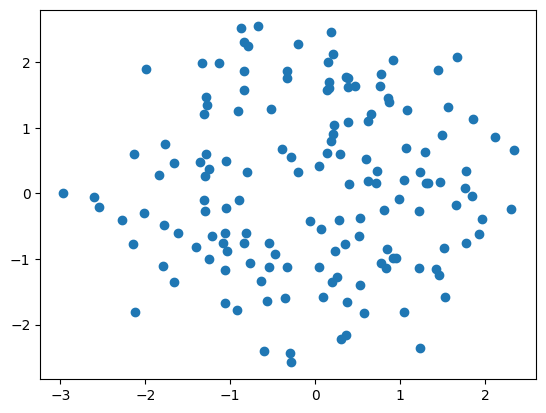

In [52]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1])

In [101]:
data = pd.DataFrame(np.random.randint(1, 101, size=(200,)))
data

,0
0,54
1,17
2,34
3,72
4,71
...,...
195,25
196,45
197,48
198,99


In [118]:
data[1] = 0.0
indices = np.random.permutation(200)
res = 130**2
data.iloc[indices[:100], 1] = (130**2 - data.iloc[indices[:100], 0]**2)**0.5 
data.iloc[indices[100:], 1] = (120**2 - data.iloc[indices[100:], 0]**2)**0.5
data

,0,1
0,54,118.253964
1,17,118.789730
2,34,125.475097
3,72,108.240473
4,71,108.899036
...,...,...
195,25,127.573508
196,45,121.963109
197,48,109.981817
198,99,84.255564


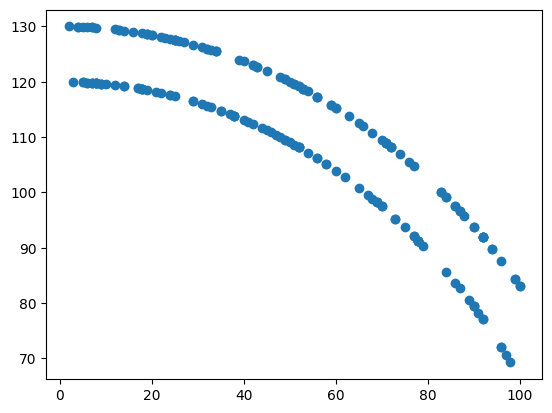

In [119]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])

In [120]:
y = pd.Series([0] * 200)
y[indices[:100]] = 1
y

0      1
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    1
199    1
Length: 200, dtype: int64

In [121]:
data[data[1] == np.inf]

,0,1


In [123]:
X_train, X_test, y_train, y_test = train_test_split(data, y, shuffle=True)
model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(f1_score(y_pred=y_pred, y_true=y_test))

1.0
1.0


In [17]:
data = pd.DataFrame(np.random.uniform(-100, 100, size=200))
data[1] = 0.0
data

,0,1
0,17.191258,0.0
1,75.272423,0.0
2,89.202627,0.0
3,-54.105433,0.0
4,53.217608,0.0
...,...,...
195,3.022175,0.0
196,-82.620644,0.0
197,80.477182,0.0
198,36.124580,0.0


In [18]:
indices = np.random.permutation(200)
ind1 = indices[:100]
ind2 = indices[100:]

In [31]:
#x + 2y = 5
#2x - 3y = 6
#x is given

data.iloc[ind1, 1] = (5 - data.iloc[ind1, 0]) / 2
data.iloc[ind2, 1] =  (6 - 2 * data.iloc[ind2, 0]) / 3
data

,0,1,2
0,17.191258,-6.095629,1
1,75.272423,-35.136212,1
2,89.202627,-42.101314,1
3,-54.105433,29.552716,1
4,53.217608,-33.478405,0
...,...,...,...
195,3.022175,0.988912,1
196,-82.620644,43.810322,1
197,80.477182,-37.738591,1
198,36.124580,-22.083054,0


In [32]:
data[2] = 0
data.iloc[ind1, 2] = 1
data

,0,1,2
0,17.191258,-6.095629,1
1,75.272423,-35.136212,1
2,89.202627,-42.101314,1
3,-54.105433,29.552716,1
4,53.217608,-33.478405,0
...,...,...,...
195,3.022175,0.988912,1
196,-82.620644,43.810322,1
197,80.477182,-37.738591,1
198,36.124580,-22.083054,0


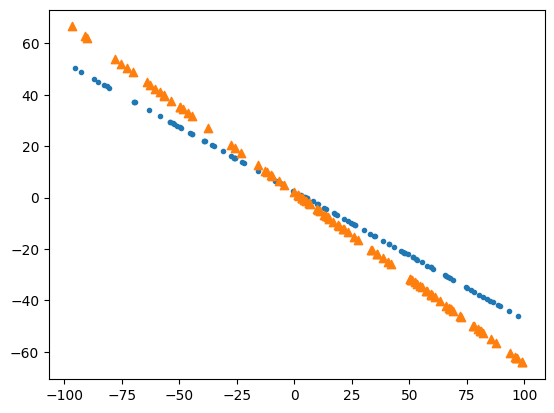

In [33]:
plt.scatter(data.iloc[ind1, 0], data.iloc[ind1, 1], marker='.')
plt.scatter(data.iloc[ind2, 0], data.iloc[ind2, 1], marker='^')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :2], data.iloc[:, 2], shuffle=True)
model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(f1_score(y_pred=y_pred, y_true=y_test))

0.76
0.8125


In [13]:
import pandas as pd
import numpy as np

In [3]:
model_data = pd.read_csv('australia_train_data.csv')
model_data

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,...,pet_mean,ppt_mean,soil_mean,srad_mean,swe_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
0,3108953447,2018-10-06 00:00:00,Australia,Australia,New South Wales,-32.136533,152.345153,Crinia Signifera,0,0,...,122.515002,78.956667,86.060001,202.539550,0.0,24.752166,13.260166,1.469033,0.768167,3.858167
1,2805655442,2018-09-18 00:00:00,Australia,Australia,New South Wales,-33.376231,150.185438,Crinia Signifera,0,1,...,94.620002,70.815000,61.070002,197.531135,0.0,17.464500,6.493000,0.971417,0.505833,3.512667
2,3108887504,2018-09-06 00:00:00,Australia,Australia,New South Wales,-34.496490,150.762660,Crinia Signifera,0,2,...,116.523334,88.481667,93.835002,194.666467,0.0,23.087500,12.855000,1.373983,0.705000,4.115000
3,3108851861,2019-08-29 00:00:00,Australia,Australia,New South Wales,-34.466653,150.010261,Crinia Signifera,0,3,...,105.906668,51.491667,38.143334,197.398818,0.0,21.126666,8.092833,1.056167,0.707500,2.945333
4,3463682945,2019-10-07 00:00:00,Australia,Australia,Western Australia,-31.935800,115.886000,Crinia Glauerti,0,4,...,140.043336,52.176667,58.045001,232.393621,0.0,24.345166,13.365333,1.352933,1.016000,4.695167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,1457334961,2017-01-23 00:00:00,Australia,Australia,New South Wales,-34.924979,150.647032,Litoria Fallax,1,37397,...,113.420002,88.605000,128.325001,194.388579,0.0,22.368500,13.190500,1.369700,0.659000,4.104167
37182,3108865868,2019-02-03 00:00:00,Australia,Australia,New South Wales,-34.028797,151.225626,Litoria Fallax,1,37398,...,117.751669,89.018333,81.860001,195.746791,0.0,23.062499,13.867833,1.440283,0.688333,4.484833
37183,3408189344,2019-12-24 21:22:00,Australia,Australia,Queensland,-26.754987,152.839291,Litoria Fallax,1,37399,...,117.921669,113.293333,141.200001,210.919648,0.0,24.605499,13.768000,1.564200,0.750500,3.474000
37184,2981077059,2018-11-22 03:59:00,Australia,Australia,New South Wales,-34.791600,150.779300,Litoria Fallax,1,37400,...,115.260002,93.385000,117.718335,194.086769,0.0,22.557833,13.278000,1.377050,0.667167,4.263833


In [4]:
model_data.columns

Index(['gbifID', 'eventDate', 'country', 'continent', 'stateProvince',
       'decimalLatitude', 'decimalLongitude', 'species', 'occurrenceStatus',
       'key', 'aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'soil_mean', 'srad_mean', 'swe_mean', 'tmax_mean', 'tmin_mean',
       'vap_mean', 'vpd_mean', 'ws_mean'],
      dtype='object')

In [18]:
features = ['aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'soil_mean', 'srad_mean', 'swe_mean', 'tmax_mean', 'tmin_mean',
       'vap_mean', 'vpd_mean', 'ws_mean']
grouped = model_data.groupby(features, as_index=False)

In [66]:
check = grouped.count()
check

,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,soil_mean,srad_mean,swe_mean,tmax_mean,tmin_mean,...,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key
0,16.175000,178.015002,-0.485667,194.190003,17.051667,6.758333,265.090026,0.0,32.664833,19.065500,...,2,2,2,2,2,2,2,2,2,2
1,16.680000,125.233336,-1.632167,141.913336,17.558333,0.200000,215.141399,0.0,25.278499,10.561833,...,1,1,1,1,1,1,1,1,1,1
2,17.975000,115.671668,-1.563833,133.646669,18.918333,0.100000,211.021525,0.0,24.277666,10.319166,...,6,6,6,6,6,6,6,6,6,6
3,18.406667,117.311668,-1.604833,135.718335,19.380000,0.100000,212.936530,0.0,24.661999,10.627500,...,1,1,1,1,1,1,1,1,1,1
4,18.610000,115.908334,-1.604167,134.518336,19.583333,0.100000,211.899840,0.0,24.364999,10.503000,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,118.265003,16.281667,0.447333,134.546669,284.136667,431.721668,228.130243,0.0,29.003999,20.331333,...,1,1,1,1,1,1,1,1,1,1
3222,119.310002,19.466667,-0.006333,138.776668,251.735000,359.958334,229.131898,0.0,28.454333,20.316333,...,1,1,1,1,1,1,1,1,1,1
3223,120.471668,20.453334,-0.185500,140.925003,235.590000,356.716673,229.433674,0.0,28.752499,20.415666,...,9,9,9,9,9,9,9,9,9,9
3224,121.283336,18.166667,0.746167,139.450004,266.701667,364.508342,230.374702,0.0,28.692499,20.639833,...,7,7,7,7,7,7,7,7,7,7


In [68]:
np.unique(np.array([1, 2, 3, 1, 2, 3, 1, 2, 3, 4, 5]))

array([1, 2, 3, 4, 5])

In [67]:
np.unique(check['key'])

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   81,   82,   83,   85,   86,   89,   90,   91,   92,
         95,   98,  100,  103,  104,  107,  110,  116,  117,  122,  123,
        126,  128,  129,  140,  141,  142,  151,  154,  156,  157,  165,
        172,  179,  183,  198,  199,  203,  216,  232,  251,  255,  257,
        262,  281,  314,  345,  370,  373,  545,  809, 1445, 2574],
      dtype=int64)

In [70]:
feat_check = check[check['key'] == 2574][features]
feat_check

,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,soil_mean,srad_mean,swe_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
2570,77.468335,35.011668,-2.759833,112.480001,90.358333,64.963335,196.751565,0.0,23.258999,12.680333,1.40025,0.6955,3.594333


In [32]:
problematic = model_data.merge(feat_check, how='inner')
problematic.shape

(2574, 23)

In [40]:
cha = np.array(problematic[['decimalLatitude', 'decimalLongitude']])

In [64]:
cha = [tuple(i) for i in cha]
len(set(cha))

65

In [51]:
a = np.array([[1, 2, 3, 2], [1, 2, 42, 4], [1, 2, 42, 4]])

In [54]:
np.unique(a, axis=1)

array([[ 1,  2,  2,  3],
       [ 1,  2,  4, 42],
       [ 1,  2,  4, 42]])

In [75]:
features = ['aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'soil_mean', 'srad_mean', 'swe_mean', 'tmax_mean', 'tmin_mean',
       'vap_mean', 'vpd_mean', 'ws_mean']
data_cleaned = model_data.groupby(features, as_index=False).sum()

In [76]:
np.unique(data_cleaned['occurrenceStatus'])

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   52,   53,   54,   55,
         56,   58,   59,   60,   61,   63,   64,   65,   66,   69,   70,
         73,   74,   78,   80,   83,   90,   94,   98,  101,  104,  106,
        113,  117,  122,  150,  160,  161,  164,  171,  179,  193,  237,
        246,  259,  261,  314,  367, 1223, 2080], dtype=int64)

In [81]:
X = data_cleaned[features]
y = (data_cleaned['occurrenceStatus'] >= 1) * 1

In [83]:
X.shape

(3226, 13)

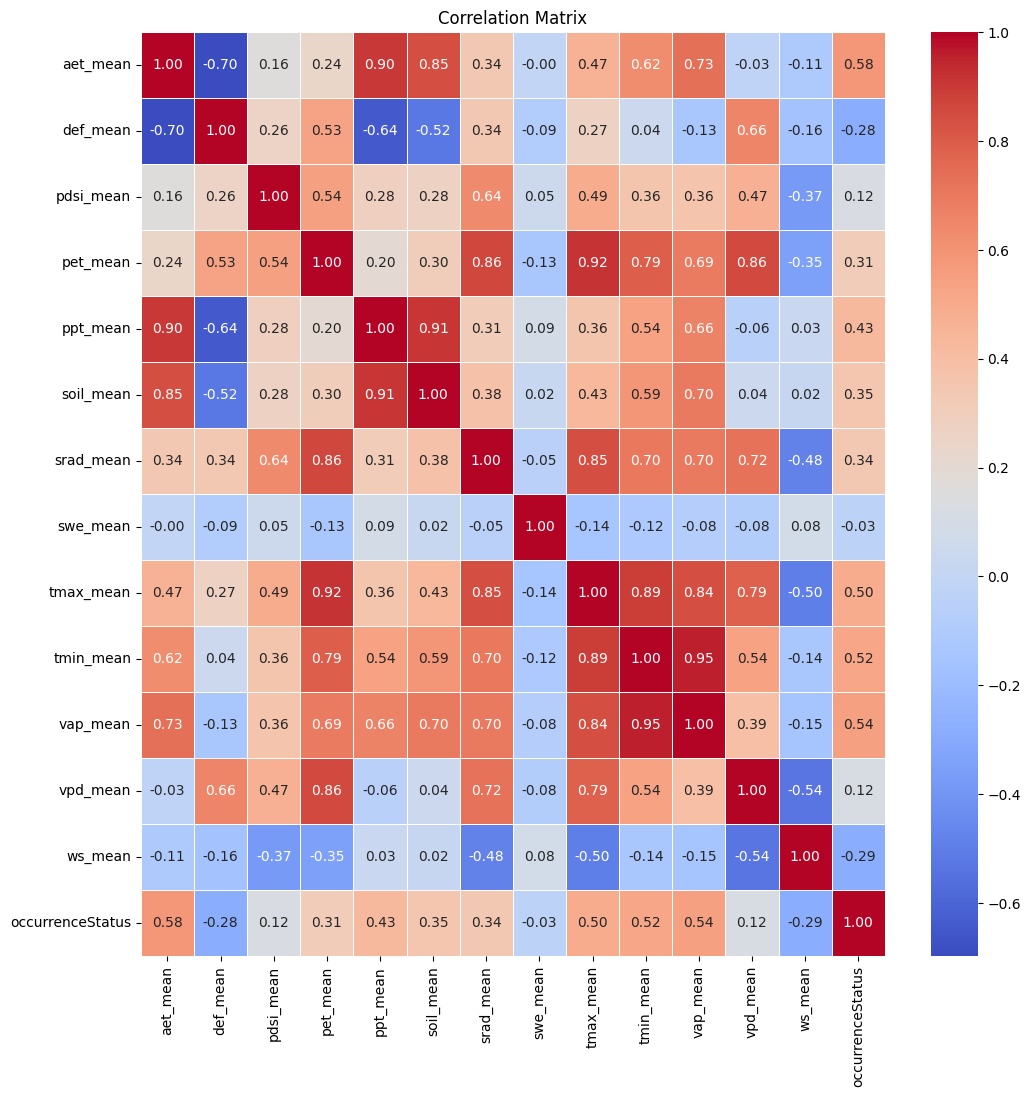

In [86]:

correlation_matrix = pd.concat([X, y], axis=1).corr()
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)
cv_model = LogisticRegression()
cv_model.fit(X_train, y_train)
y_pred = cv_model.predict(X_test)
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(f1_score(y_pred=y_pred, y_true=y_test))

0.8615702479338843
0.8138888888888889


c:\UMD\Sem 2\IC24\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
cv_model = SVC()
cv_model.fit(X_train, y_train)
y_pred = cv_model.predict(X_test)
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(f1_score(y_pred=y_pred, y_true=y_test))

0.8823529411764706
0.8396624472573839


Train Accuracy: 100.00%
Test Accuracy: 83.06%


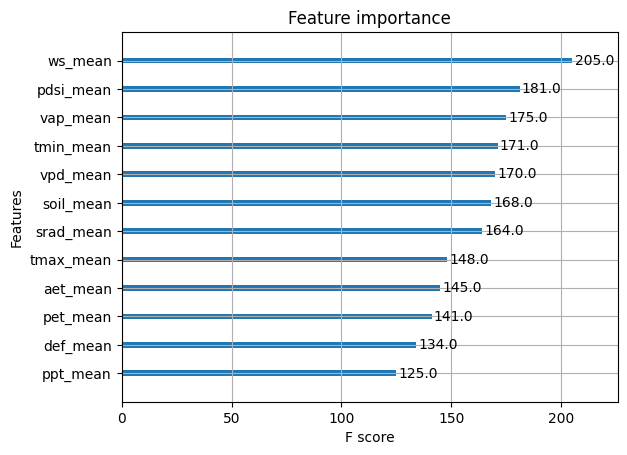

In [98]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]

# evaluate predictions with train and test data
accuracy = accuracy_score(y_train, model.predict(X_train))
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

# plot the feature importance
plot_importance(model)
plt.show()

In [103]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
clf = RandomForestClassifier()
tree_model = cross_validate(clf, X_train, y_train, scoring=['accuracy', 'f1'], cv=10)
# print(f"Accuracy scores: {scores['test_accuracy']}")
# print(f"F1 scores: {scores['test_f1']}")
tree_model['test_accuracy'].mean(), tree_model['test_f1'].mean()

(0.9282945736434108, 0.9051916509078612)

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
tree_clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

tree_model = cross_validate(tree_clf, X_train, y_train, scoring=['accuracy', 'f1'], cv=10)
# print(f"Accuracy scores: {scores['test_accuracy']}")
# print(f"F1 scores: {scores['test_f1']}")
tree_model['test_accuracy'].mean(), tree_model['test_f1'].mean()

(0.8988372093023257, 0.8631184740677416)

In [104]:
tree_clf = DecisionTreeClassifier(criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

tree_model = cross_validate(tree_clf, X_train, y_train, scoring=['accuracy', 'f1'], cv=10)
# print(f"Accuracy scores: {scores['test_accuracy']}")
# print(f"F1 scores: {scores['test_f1']}")
tree_model['test_accuracy'].mean(), tree_model['test_f1'].mean()

(0.894186046511628, 0.8587179218910352)